# Calculation Template
## Client: INTERNAL
---
## Project: A novel solution method for equilibrium with competing reactions
## Calc: 2021-CALC-Eqm-001
## By: K. Dorma
## Date: July, 2021
---
## Authentication
> Stamp, Permit
---
## Revision History
|Revision | Date | Description | By | Reviewer|
| :-------| :----|:------------|:---|:--------|
|    1.0  | Dec. 2020 | Demo code | KCD |  |
|    2.0  | feb 13 2020   | Python    | KCD     |    |

---

## Abstract
Write something.

## Introduction

Equilibrium calculations form the heart of chemical engineering. The most frustrating applications are with ionic solutions where there are a large number of species and many competing reactions.

There is some great software for this, many of which are derived from MINEQL which originated at MIT in the early 1970's. MINEQL uses a simultaneous solution to the linear material balance equations and the nonlinear equilibrium expressions (refer to Wolery for an explaination of the mathematics).

This short note presents a novel variation of the iterative solution method used in MINEQL. It is hoped that this new algorithm is easier to implement in a spreadsheet or high level programming languages such as SciLab or Python. We will combine concpets in matrix algebra and Taylor series to devise a standard way to approach a difficult problem in chemistry.



## Governing equation

The mathematics will be developed using the following set of equilibrium reactions involving the carbonate and sulfide systems. Each reaction has an equilibrium constant K_i and an extent of reaction r_i.

* H<sub>2</sub>S = HS<sup>-</sup> + H<sup>+</sup>			(K<sub>1</sub>, r<sub>1</sub>)
* HS<sup>-</sup> = S<sup>-2</sup> + H<sup>+</sup>				(K<sub>2</sub>, r<sub>2</sub>)
* H<sub>2</sub>CO<sub>3</sub> = HCO<sub>3</sub><sup>-</sup> + H<sup>+</sup>					(K<sub>3</sub>, r<sub>3</sub>)
* HCO<sub>3</sub><sup>-</sup> = CO<sub>3</sub><sup>-2</sup> + H<sup>+</sup>				(K<sub>4</sub>, r<sub>4</sub>)
* H<sub>2</sub>O = OH<sup>-</sup> + H<sup>+</sup>					(K<sub>5</sub>, r<sub>5</sub>)

Precipitation of a solute is not considered.


The reaction stoichimetry is expressed as a matrix S(m,n) where m is the number of reactions and n is the number of species (written as acid dissociation):


|Rxn Name|Equation | H<sub>2</sub>S | HS<sup>-</sup> | S<sup>-2</sup> | H<sub>2</sub>CO<sub>3</sub>| HCO<sub>3</sub><sup>-</sup> | CO<sub>3</sub><sup>-2</sup> | OH<sup>-</sup> | H<sup>+</sup> | H<sub>2</sub>O |
| :------| :-------| :---|:----|:----|:-----|:-----|:------|:---|:----|:----|
|H2S  1  | H<sub>2</sub>S = HS<sup>-</sup> + H<sup>+</sup>  |-1	|1	|0	|0	|0	|0	|0	|1  | 0 |
|H2S 2   |HS<sup>-</sup> = S<sup>-2</sup> + H<sup>+</sup>  |0	|-1	|1	|0	|0	|0	|0	|1	|0  |
|Carbonic 1|H<sub>2</sub>CO<sub>3</sub> = HCO<sub>3</sub><sup>-</sup> + H<sup>+</sup> |0 |0	|0	|-1	|1	|0	|0	|1	|0  |
|Carbonic 2|HCO<sub>3</sub><sup>-</sup> = CO<sub>3</sub><sup>-2</sup> + H<sup>+</sup> |0 |0	|0	|0	|1	|1	|0	|1	|0  |
|Water | H<sub>2</sub>O = OH<sup>-</sup> + H<sup>+</sup>        |0	|0	|0	|0	|0	|0	|1	|1	|-1 |


The concentration of each species is denoted C_i. The material balance for each reaction is represented by the matrix equation:

S c = 0

where the stoichiometry matrix S does _not_ include the solvent species water.

The conservation of mass for each species relates the initial concentration of the species and the extent of each reaction that the species appears in. For example, the concentration of HS- is

[HS-] = [HS-]ic + r1 - r2

A pattern is seen when we take the transpose of the stoichiometry matrix S.

|Species | Initial Conc | r1 | r2 | r3 | r4 | r5 |
| :------| :------------|:---|:---|:---|:---|:---|
| H<sub>2</sub>S    | [H2S]ic      |-1  |  0 |  0 |  0 | 0  | 
| HS<sup>-</sup>    | [HS-]ic      | 1	| -1 | 0 |	0 |	0 | 
| S<sup>-2</sup>    | [S2-]ic      | 0  | 1	 | 0 |	0 | 0 |
| H<sub>2</sub>CO<sub>3</sub>    | [H2CO3]ic      | 0 |	0 |	-1 | 0 | 0 |
| HCO<sub>3</sub><sup>-</sup>  | [HCO3-]ic    | 0 |	0 |	1 |	1 |	0 | 
| CO<sub>3</sub><sup>-2</sup>  | [CO32-]ic    | 0 |	0 |	0 |	1 |	0 |
| OH<sup>-</sup>    | [OH-]ic      | 0 | 0 | 0 | 0 | 1 | 
| H<sup>+</sup>     | [H+]ic       | 1 | 1 | 1 | 1 | 1 | 




The concentration of each species is related to the initial concentration of each species by the matrix equation
$$
I c - S^T r = c_{IC}
$$

Each of the five equilibrium products are:
* K1 = [HS-] [H+] / [H2S]
* K2 = [S-2] [H+] / [HS-]
* K3 = [HCO3-] [H+] / [H2CO3]
* K4 = [CO3-2] [H+] / [HCO3-]
* K5 = [H+][OH-]




These equations are written in a linear form by taking the logarithm.

* ln K1 = ln [HS-] + ln [H+] – ln [H2S]
* ln K2 = ln [S-2] + ln [H+] – ln [HS-]
* ln K3 = ln [HCO3-] + ln [H+] - ln [H2CO3]	
* ln K4 = ln [CO3-2] + ln [H+] – ln [HCO3-]
* ln K5 = ln [H+] + ln [OH-]

We can write the equilibrium expressions using the stoichiometry matrix S:

S (ln c) = ln K

This is where the computational difficulty arrises. The material balances and reaction extents are linear with respect to the species concentration, while the equilibrium expressions are linear with respect to the logarithm of concenentration.

The MINEQL algorithm uses the logarithm of concentrations as the solution variables, which makes the equilibrium expression linear.
The reaction extent and material balances are expressed as non-linear functions of (ln ci). The material balance expressions are written as exponential functions of (ln ci), and the entries in the Jacobian matrix are complex expression of (ln ci).


We will take a different approach, with the intention of creating a simple recipe for setting up equations for solving equilibrium problems.

Consider the variable x and its logarithm. The two are related by the identity:
$$
x = \exp(\ln x)
$$
We seek a linear approximation (a Taylor series) to relate the variable x and the logarithm of the variable. Note that the derivative is
$$
\frac{d(x)}{d(\ln x)} = \exp(\ln x)
$$
Since we have estimates of x and ln x at the n iteration level, we can use a Taylor series to write a linear equation for the value of x and ln x at the n+1 iteration level
$$
x^{n+1} = x + (\ln x^{n+1} - \ln x) \frac{d(x)}{d(\ln x)} \\
x^{n+1} = x + (\ln x^{n+1} - \ln x) \frac{d(\exp({\ln x}))}{d(\ln x)} \\
x^{n+1} = x + (\ln x^{n+1} - \ln x) \exp{(\ln x)}
$$
and since
$$
x = \exp{\ln x}
$$
we obtain
$$
x^{n+1} - \exp{(\ln x)} (\ln x)^{n+1} = \exp({\ln x}) (1 - (\ln x) )
$$
The last equation couples the value of the concentration to the logarithm of concentration.  This relationship is important because it ensures that concentrations remain positive values.  A negative value for a concentration does not impact the solution to the linear system.

This expression is written as:
$$
c^{n+1} – exp(\ln c) (\ln c)^{n+1} = exp(\ln c) ( 1 – \ln c)
$$
or in matrix form
$$
I c^{n+1} - \delta c (\ln c)^{n+1} = e^{\ln c} (1 - \ln c)
$$
where (ln c) is the past estimate for the log of the concentrations.

Given the known values for the right hand side vector b we get a matrix equation of the form

$$
A x^{n+1} = b
$$

which defines the conservation of mass for each species, equilibrium for each reaction and the Taylor series to relate species concentration and it's logarithm.

The solution vector _x_ comprises the species concentration _c_, the extent of each reaction _r_ and the logarithm of the species concentration _ln c_.
$$
x^{n+1}=\left[
\begin{matrix}
c^{n+1} \\ 
r \\
(\ln{c})^{n+1} \\
\end{matrix}
\right]
$$

And
$$
A=\left[\begin{matrix}
I & S^T & 0 \\
0 & 0 & S \\
I & 0 & -I c \\
\end{matrix}\right]
$$

$$
b=\left[\begin{matrix}
c_{o}\\
\ln{K}\\
\exp{(\ln c)}(1 - (\ln c))\\
\end{matrix}\right]
$$

As a complete block matrix:
$$
\left[\begin{matrix}
I & S^T & 0 \\
0 & 0 & S \\
I & 0 & -I c \\
\end{matrix}\right]
\left[
\begin{matrix}
c^{n+1} \\ 
r \\
(\ln{c})^{n+1} \\
\end{matrix}
\right]
=
\left[\begin{matrix}
c_{o}\\
\ln{K}\\
\exp{(\ln c)}(1 - (\ln c))\\
\end{matrix}\right]
$$


The next guess for each of the unknowns (c, r, (ln c)) is obtained by solving
$$
x^{n+1} = A^{-1} b
$$


## Example

In [1]:
import numpy as np
import pandas as pd
import math
import scipy as sp
import copy
from scipy import interpolate
import matplotlib.pyplot as plt


In [2]:
# set our input file
ourData = 'reactionDataTest2.xlsx'

In [3]:
# get our data
speciesData = pd.read_excel(ourData, sheet_name="speciesDataShort")

reactionData = pd.read_excel(ourData, sheet_name="reactions")



In [4]:
speciesData
# I need the initial concentration and the initial guess

,species,initialConc,concUnits,initialGuess
0,H2S,0.003040,NaN,1
1,HS-,0.000000,NaN,1
2,S2-,0.000000,NaN,1
3,H2CO3,0.000102,NaN,1
4,HCO3-,0.000000,NaN,1
5,CO32-,0.000000,NaN,1
6,OH-,0.000000,kgmol/m3,1
7,H+,0.000000,NaN,1
8,H2O,55.509298,NaN,1


In [5]:
reactionData

,reactionName,reactionText,reference,Keqm0,H2S,HS-,S2-,H2CO3,HCO3-,CO32-,OH-,H+,H2O
0,H2S 1,H2S = HS- + H+,https://chem.libretexts.org/Ancillary_Material...,8.900000e-09,-1,1,0,0,0,0,0,1,0
1,H2S 2,HS- = S2- + H+,NaN,1.000000e-19,0,-1,1,0,0,0,0,1,0
2,carbonic1,H2CO3 = HCO3- + H+,NaN,4.500000e-07,0,0,0,-1,1,0,0,1,0
3,carbonic2,HCO3- = CO32- + H+,NaN,4.700000e-11,0,0,0,0,-1,1,0,1,0
4,water,H2O = H+ + OH-,NaN,1.000000e-14,0,0,0,0,0,0,1,1,-1


In [6]:
# create the stoichiometry matrix S, ignore water as per convention
S = reactionData[['H2S','HS-', 'S2-', 'H2CO3', 'HCO3-', 'CO32-', 'OH-', 'H+']].to_numpy()
# and the equilibrium constants
K = reactionData[['Keqm0']].to_numpy()
lnK = np.log(K).T
nRxn = np.size(S,(0))


In [7]:
# this is a messy way to get the initial concentrations for everything but water (at the end)
testInit = speciesData[['initialConc']].to_numpy()
nSpecies = np.size(testInit)-1
concInit = np.zeros(nSpecies)
concInit = testInit[0:nSpecies]

In [8]:
# this is a messy way to get the initial guesses for everything but water (at the end)
testGuess = speciesData[['initialGuess']].to_numpy()

# we will iterate on conc and lnConc
conc = np.zeros(nSpecies)
conc = testGuess[0:nSpecies].T
lnConc = np.log(conc)
conc, lnConc

(array([[1, 1, 1, 1, 1, 1, 1, 1]]), array([[0., 0., 0., 0., 0., 0., 0., 0.]]))

In [9]:
rExtent = np.zeros(nRxn) # reaction extent

In [10]:
# we need some block matrices for

# | I  S^T  0            | |c  | = | cO         |
# | 0   0   S            | |r  |   | ln K       |
# | I   0  -I.exp(ln(c)) | |lnc|   | exp(ln(c))*(1−(lnc)) |

# make some zeros and identity matrix
z02 = np.zeros((nSpecies,nSpecies))

z10 = np.zeros((nRxn,nSpecies))
z11 = np.zeros((nRxn,nRxn))

z21 = np.zeros((nSpecies,nRxn))

eye = np.identity(nSpecies)


In [11]:
# take the lazy route and take fixed number of iterations
# store all of the lnconc values in an array
nIter = 30
allLnConc = np.zeros((nIter,nSpecies))
allLnErr = np.zeros((nIter))
iteration = np.arange(nIter)

In [12]:
for i, value in enumerate(iteration):
    # create block matrix
    blockA = np.block([[eye, S.T, z02],
                       [z10, z11,   S],
                       [eye, z21, -eye*np.exp(lnConc)]])
    blockb = np.block([concInit.T, lnK, np.exp(lnConc)*(1.0-lnConc)])
    
    nextX = np.linalg.solve(blockA,blockb.T)
    
    concNext, rNext, lnCnext = np.split(nextX, [nSpecies,nSpecies+nRxn])
    
    lnCErr = np.linalg.norm(lnConc.T - lnCnext)
    
    conc = concNext.T
    rExtent = rNext.T
    lnConc = lnCnext.T
    
    # save the lnConc values for plotting convergence history
    allLnConc[i,:] = lnConc
    allLnErr[i] = lnCErr
# end for loop


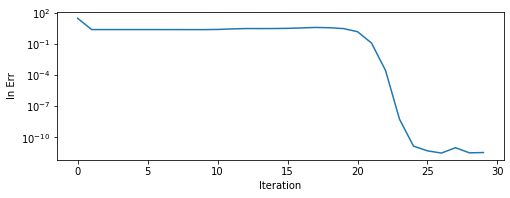

In [13]:
# plotting a line plot after changing it's width and height
f = plt.figure()
figAspect = 1024/768.
figWidth = 8
figHeight = figWidth / figAspect
f.set_figwidth(figWidth)
f.set_figheight(figHeight)

ax = f.add_subplot(2, 1, 1)

ax.set_yscale('log')

plt.plot(iteration, allLnErr)
plt.xlabel ('Iteration')
plt.ylabel ('ln Err')
plt.savefig('convergence.png', dpi=300)

Initially, convergence is zero order with respect to log concentration because our initial guesses are extremely poor (concentrations could be off by many orders of magnitude). Each iteration adjusts the concentration by an order of magnitude and adjusts the logarithms by a constant value. Once the concentrations are close to the final value (after 20 iterations), the algorithm displays second order convergence.

In [16]:
# tabulate the final results, we need to ignore the species water
h2oIndex = speciesData[speciesData['species'] == 'H2O'].index
data = {'species':speciesData["species"]}

ourResults = pd.DataFrame(data)
ourResults = ourResults.drop(h2oIndex)

ourResults['concentration'] = conc.T
ourResults['lnConc'] = lnConc.T
ourResults['neglog10Conc'] = -(1.0/math.log(10.0))*lnConc.T
ourResults

,species,concentration,lnConc,neglog10Conc
0,H2S,3.036783e-03,-5.796956,2.517586
1,HS-,3.216527e-06,-12.647208,5.492613
2,S2-,5.681526e-17,-44.709363,19.417029
3,H2CO3,9.681509e-05,-9.242708,4.014057
4,HCO3-,5.184882e-06,-12.169763,5.285261
5,CO32-,2.900148e-11,-24.263674,10.537580
6,OH-,1.190100e-09,-20.549229,8.924417
7,H+,8.402657e-06,-11.686963,5.075583


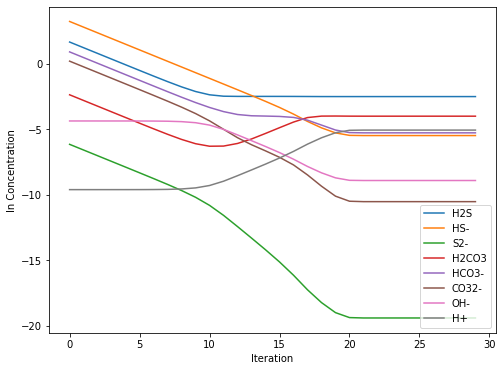

In [15]:
# plotting a line plot after changing it's width and height
f = plt.figure()
figAspect = 1024/768.
figWidth = 8
figHeight = figWidth / figAspect
f.set_figwidth(figWidth)
f.set_figheight(figHeight)


plt.plot(iteration, (1.0/math.log(10.0))*allLnConc[:,:])
plt.legend(ourResults['species'], loc=4)
plt.xlabel ('Iteration')
plt.ylabel ('ln Concentration')
plt.savefig('convergence2.png', dpi=300)

The algorithm requires 20 iterations to produce the converged values.


## References

* MINEQL, https://mineql.com/index.html
* T.J. Wolery, CALCULATION OF CHEMICAL EQUILIBRIUM BETWEEN AQUEOUS SOLUTION AND MINERALS: THE EQ3/6 SOFTWARE PACKAGE, UCRL-52658 (1979)
* Acid disccoication constants, https://chem.libretexts.org/Ancillary_Materials/Reference/Reference_Tables/Equilibrium_Constants/E1%3A_Acid_Dissociation_Constants_at_25C.
